In [1]:
#Modules and Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()

In [14]:
# We see the first 5 and last 5 rows of our data

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [16]:
# We see what type of data our data is and its memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
# We see the basic statistics values for the numeric variable in the data frame

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [18]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values, great!

Perform An Exploratory Data Analysis


---



In [23]:
# "bmi" feature of our data
df["bmi"].describe().T



count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

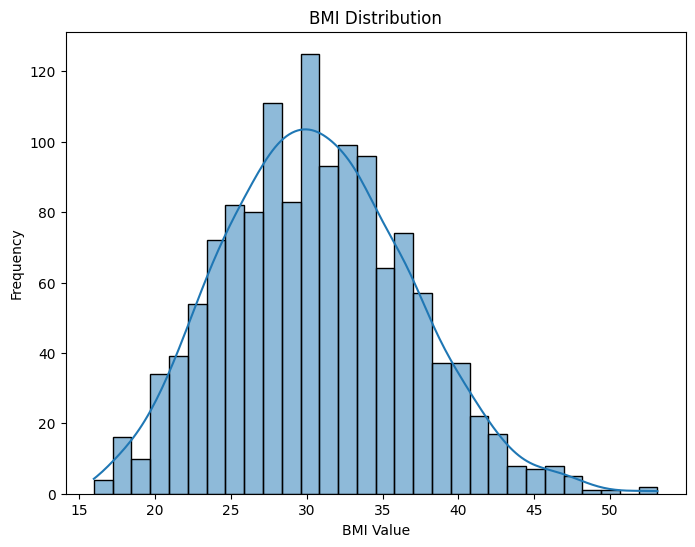

In [26]:
# The BMI (Body Mass Index) distribution is below.
plt.figure(figsize=(8, 6))
sns.histplot(df["bmi"],bins = 30,kde = True)
plt.title("BMI Distribution")
plt.xlabel("BMI Value")
plt.ylabel("Frequency")
plt.show()

It is observed that the BMI Distribution mostly varies between 25 and 35.

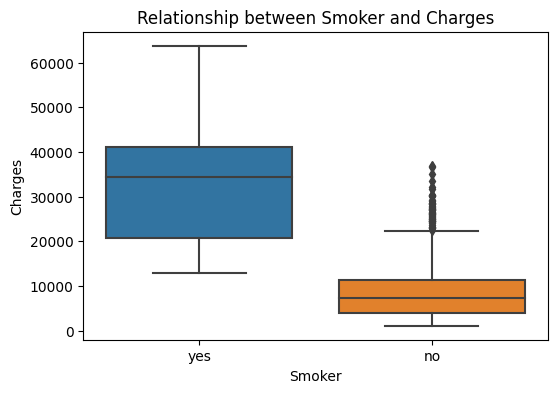

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Relationship between Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

It can be observed that smokers generally incur higher expenses.

In [46]:
# We examine the relationship between “smoker” and “region”.

smoker_region_counts = df.groupby(["smoker", "region"]).size().unstack()
print(smoker_region_counts)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


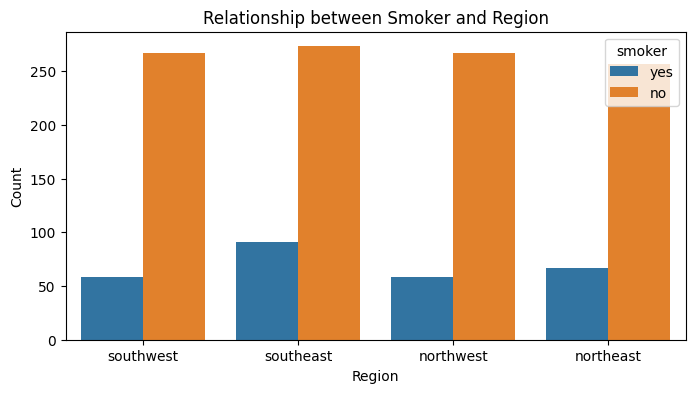

In [35]:
# We can create a count plot to see how many smokers and non-smokers are there in each region.

plt.figure(figsize=(8, 4))
sns.countplot(x="region", hue="smoker", data=df)
plt.title("Relationship between Smoker and Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

The number of smokers is higher in the Southeast.

In [48]:
# We calculate the statistics of the "bmi" values grouped by the "sex" variable.
bmi_sex_stats = df.groupby("sex")["bmi"].describe()
print(bmi_sex_stats)

        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


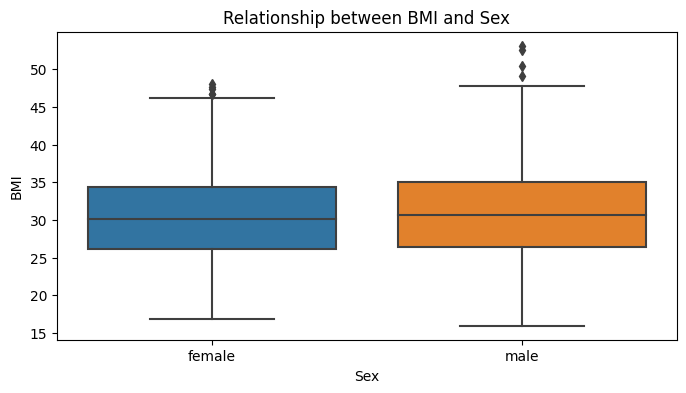

In [45]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="sex", y="bmi", data=df)
plt.title("Relationship between BMI and Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

Men's BMI is slightly higher than women's.

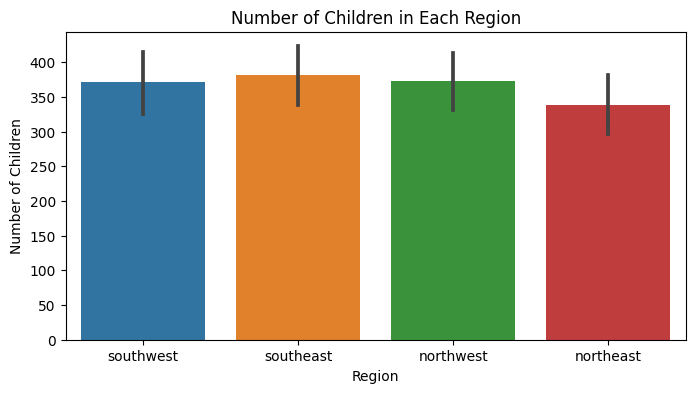

In [50]:
# We can create a bar plot to visualize the number of children in each region.

plt.figure(figsize=(8, 4))
sns.barplot(x="region", y="children", data=df, estimator=sum)
plt.title("Number of Children in Each Region")
plt.xlabel("Region")
plt.ylabel("Number of Children")
plt.show()

In [54]:
#Region with the most children.
region_children_sum = df.groupby("region")["children"].sum()
max_children_region = region_children_sum.idxmax()
max_children_count = region_children_sum[max_children_region]
print(f"The region with the most children is {max_children_region} with {max_children_count} children.")

The region with the most children is southeast with 382 children.


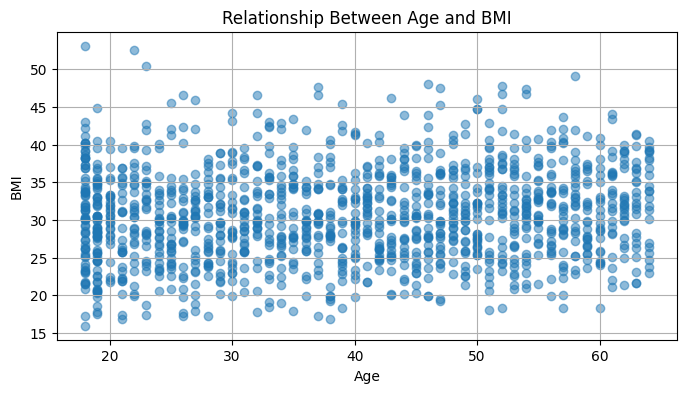

In [58]:
#Relationship between “age” and “BMI”.
plt.figure(figsize=(8, 4))
plt.scatter(df["age"], df["bmi"], alpha=0.5)
plt.title("Relationship Between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

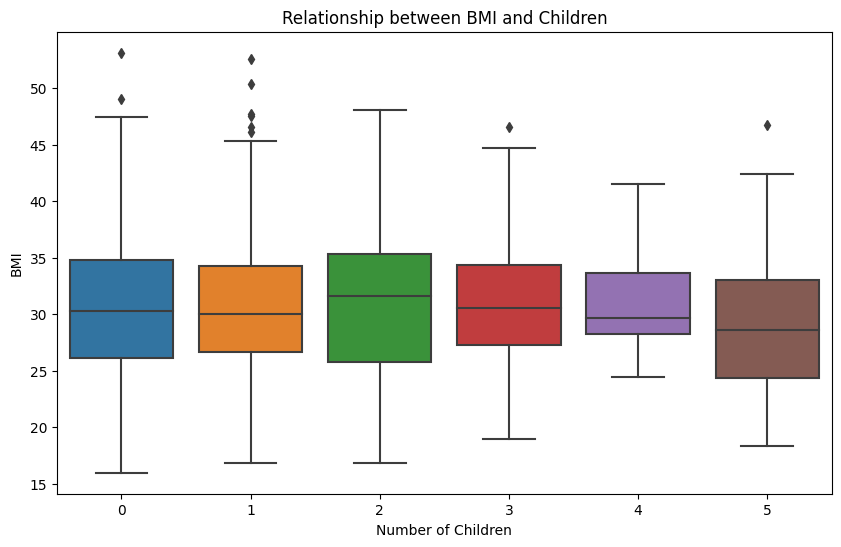

In [60]:
# We can use a box plot to visualize the relationship between "bmi" and "children".

plt.figure(figsize=(10, 6))
sns.boxplot(x="children", y="bmi", data=df)
plt.title("Relationship between BMI and Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()

In [61]:

pearson_corr2 = df["children"].corr(df["bmi"], method="pearson")
spearman_corr2 = df["children"].corr(df["bmi"], method="spearman")
print(f"Pearson Correlation: {pearson_corr2:.2f}")
print(f"Spearman Correlation: {spearman_corr2:.2f}")

Pearson Correlation: 0.01
Spearman Correlation: 0.02


The correlation between "BMI" and "children" appears to be negligible.


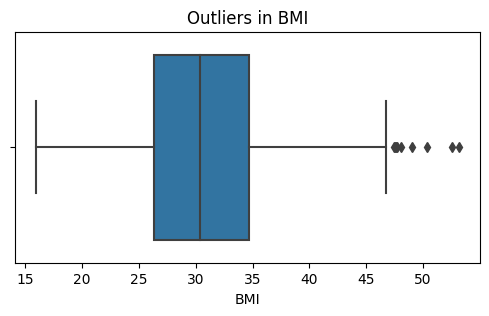

In [65]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["bmi"])
plt.title("Outliers in BMI")
plt.xlabel("BMI")
plt.show()







In [77]:
from scipy import stats
z_scores = stats.zscore(df["bmi"])
threshold = 3
outliers = abs(z_scores) > threshold
outlier_values = df["bmi"][outliers]

print("Outlier values:", outlier_values)

Outlier values: 116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


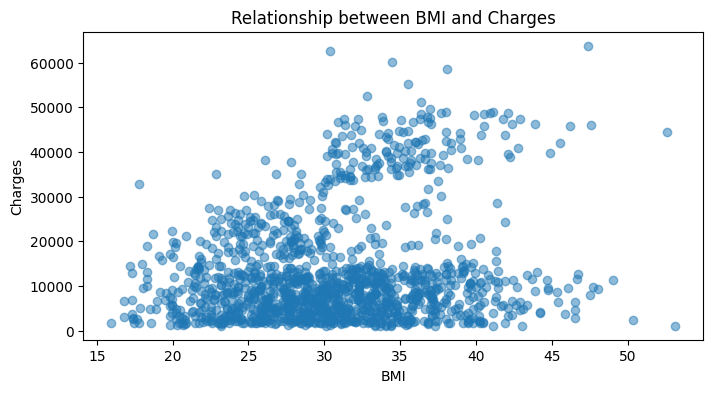

In [68]:
# We can use a scatter plot to visualize the relationship between "bmi" and "charges".

plt.figure(figsize=(8, 4))
plt.scatter(df["bmi"], df["charges"], alpha=0.5)
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

Individuals with BMI values between 20 and 35 tend to have charges concentrated in the range of 0 to 10000.


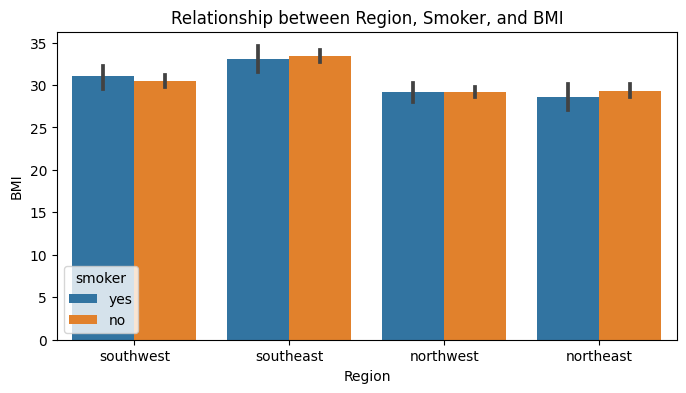

In [71]:
# We can create a bar plot to see how "bmi" varies across different combinations of "region" and "smoker".

plt.figure(figsize=(8, 4))
sns.barplot(x="region", y="bmi", hue="smoker", data=df)
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.show()

Data Preprocessing


In [80]:
#cleaning outlier values.
df_cleaned = df[~outliers]
df_encoded = pd.get_dummies(df_cleaned, columns=["region", "smoker", "sex"], prefix=["region", "smoker", "sex"])
df_encoded



,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0,1,0,0,1
1334,18,31.920,0,2205.98080,1,0,0,0,1,0,1,0
1335,18,36.850,0,1629.83350,0,0,1,0,1,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,1,1,0,1,0


In [85]:
#We split our data into training and test sets, and store the independent variables (X) and the target variable (y) in these sets.
from sklearn.model_selection import train_test_split

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Selection


In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_encoded.drop("charges", axis=1))
scaled_df = pd.DataFrame(X_scaled, columns=df_encoded.drop("charges", axis=1).columns)


In [87]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

models = [linear_reg, decision_tree_reg, random_forest_reg]
model_names = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression"]

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = (-scores)**0.5
    print(f"{name} RMSE Scores: {rmse_scores}")
    print(f"{name} Mean RMSE: {rmse_scores.mean()}\n")

Linear Regression RMSE Scores: [6084.44088532 6182.22726525 5703.22027382 6274.21477891 6096.9743586 ]
Linear Regression Mean RMSE: 6068.215512378908

Decision Tree Regression RMSE Scores: [6333.6737279  7022.78204164 6727.88547959 6486.59734121 6437.09952132]
Decision Tree Regression Mean RMSE: 6601.607622328787

Random Forest Regression RMSE Scores: [4793.10837873 5368.95379748 4354.29306056 4998.38036062 4645.15741741]
Random Forest Regression Mean RMSE: 4831.978602961348



Hyper-parameter Optimization

In [88]:

random_forest_reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_scaled, y)

print("Best Hyperparameters:", grid_search.best_params_)
best_rmse = (-grid_search.best_score_)**0.5
print("Best RMSE:", best_rmse)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE: 4578.832279291237


In [89]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_scaled)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 12657505.00367318
Mean Absolute Error (MAE): 1919.3367335087637
R-squared (R2) Score: 0.9133347203173997
